In [252]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service




In [253]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='CXW8mj'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='product-image'
    

In [254]:
itemName= 'pants'
itemName='%20'.join(itemName.strip().split())


In [255]:
keyWords=[]
itemList=[]

In [256]:
websites = [flipkart_fashion(itemName),myntra(itemName),amazon(itemName)]
namewebsites=['flipkart','myntra','amazon']

itemName ='%20'.join(input().split())


In [257]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard).text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        keyWords.extend(dis.split())
        return [name,dis,float(price)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass).text
        price=''.join(price.split(','))
        keyWords.extend(dis.split())
        return [name,dis,float(price)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            print('main',name,price)
            price=item.find('div',class_='product-price')
            print('second',price)
            if price==None:
                price=0
            else:
                price=price.text[3:]
        else:price=price.text[3:]
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        keyWords.extend(dis.split())
        print(name,dis,price)
        return [name,dis,float(price)]
        

In [258]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    
    driver = webdriver.Chrome()
    driver.get(pageurl)
    itemPage=driver.page_source
    idk = BeautifulSoup(itemPage,'html.parser')
    if namewebsites[no]=='flipkart':
        itemCards=idk.find_all('div',class_=cardClass)[1:]
    elif namewebsites[no]=='amazon':
        itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
    elif namewebsites[no]=='myntra':
        itemCards=idk.find_all('li',class_=cardClass)
    

    itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no]) for item in itemCards])

SOJANYA Men Dhoti Pants  965
Hubberholme Men Track Pants  519
Smarty Pants Women Cotton Lounge Pants  649
Hancock Checked Lounge Pants  892
Smarty Pants Women 2-Pcs Printed Night suit  783
ONLY Women Track Pants  1664
Hancock Checked Lounge Pants  892
Smarty Pants Women 2-Pcs Printed Night suit  783
Laabha Solid Track Pants  489
Smarty Pants Women Cotton Lounge Pants  649
Puma Men Track Pants  3199
boohooMAN Men Textured Track Pants  2886
Smarty Pants Women Floral Printed Lounge Pants  636
SIAPA Men Track Pants  959
SOJANYA Men Dhoti Pants  965
boohooMAN Men Tapered Track Pants  2249
Okane Men Lounge Pants  584
main max None
second <div class="product-price"><span><!-- react-text: 1165 -->Rs. <!-- /react-text --><!-- react-text: 1166 -->699<!-- /react-text --></span><!-- react-text: 1167 --><!-- /react-text --></div>
max Women Track Pants  699
main MAYSIXTY None
second <div class="product-price"><span><!-- react-text: 1197 -->Rs. <!-- /react-text --><!-- react-text: 1198 -->799<!-- /re

In [259]:
file=open('temp.txt','w')

In [260]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')


[['LEE TEX', 'Women Regular Fit Black, White Cotton Blend Trousers', 599.0], ['Roadster', 'Men Slim Fit Beige Cotton Blend Trousers', 779.0], ['PARK AVENUE', 'Men Regular Fit Brown Viscose Rayon Trousers', 950.0], ['PETER ENGLAND', 'Men Slim Fit Dark Green Pure Cotton Trousers', 1039.0], ['Raymond', 'Men Slim Fit Black Viscose Rayon Trousers', 1036.0], ['HIGHLANDER', 'Men Regular Fit Black Cotton Blend Trousers', 801.0], ['United Colors of Benetton', 'Men Slim Fit Light Blue Pure Cotton Trousers', 1689.0], ['CYPHUS', 'Men Regular Fit Cream Cotton Blend Trousers', 399.0], ['SASSAFRAS', 'Women Relaxed Pink Cotton Blend Trousers', 674.0], ['0-DEGREE', 'Men Slim Fit Black Cotton Blend Trousers', 764.0], ['Urbano Fashion', 'Men Slim Fit Purple Pure Cotton Trousers', 649.0], ['KOTTY', 'Women Regular Fit Dark Green Viscose Rayon Trousers', 381.0], ['KOTTY', 'Women Regular Fit Black Viscose Rayon Trousers', 381.0], ['ADDYVERO', 'Women Regular Fit Black Cotton Blend Trousers', 399.0], ['POPWING

# here we have multiple rows with same name , lets remove it

In [261]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['LEE TEX' 'POPWINGS' 'GRECIILOOKS' 'NEMO FASHION' 'KOTTY' 'AVOLT'
 'Cloth Theory' 'JUGULAR' 'ADDYVERO' 'CYPHUS' 'TOPLOT' 'ENDEAVOUR WEAR'
 'FRANKO ROGER' 'ELANHOOD' 'JPM brothers' 'AKIKO' 'Amazon Brand - Symbol'
 'DBURKE' 'Aahwan' 'BLUE STAR SHARK' 'Laabha' 'Hubberholme' 'Majestic Man'
 'Chromozome' 'Generic' 'Enamor' 'Tokyo Talkies' 'Alan Jones Clothing'
 'Okane' 'plusS' 'Peppyzone' 'SASSAFRAS' 'MARK LOUIIS' 'Smarty Pants'
 'T2F' 'Urbano Fashion' 'Zivame' 'Neostreak' 'Foxter' 'max' 'Van Heusen'
 '0-DEGREE' 'Amazon Brand - Inkast Denim Co.' 'Roadster' 'Whitewhale'
 'MAYSIXTY' '9rasa' 'HIGHLANDER' 'FLYING MACHINE' 'Hancock' 'Gallus'
 'PARK AVENUE' 'SIAPA' 'SOJANYA' 'McHenry' 'NAUTICA' 'Jockey' 'Raymond'
 'PETER ENGLAND' 'Cantabil' 'hummel' 'nexus' 'BEEVEE' 'CULTSPORT'
 'rock.it' 'Speedo' 'Allen Solly' 'ONLY' 'United Colors of Benetton'
 'Puma' 'The Pant Project' 'boohooMAN']


Hey its time for visualizations


(-0.5, 999.5, 999.5, -0.5)

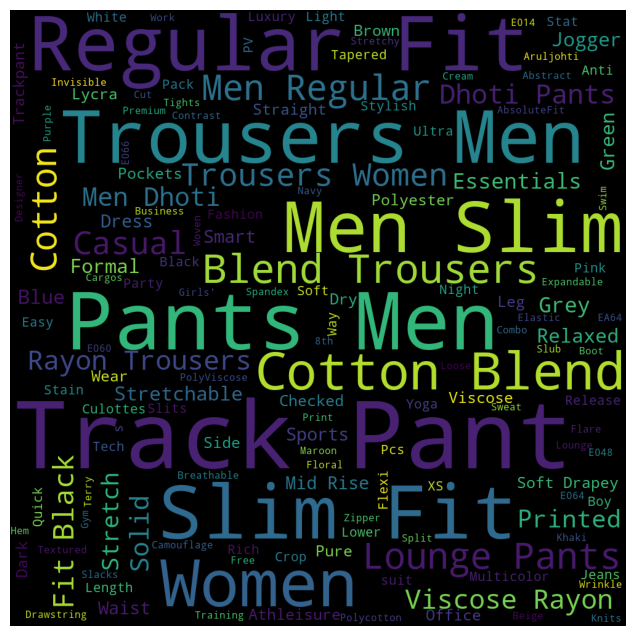

In [262]:
wordcloud = WordCloud(width = 1000, height = 1000).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



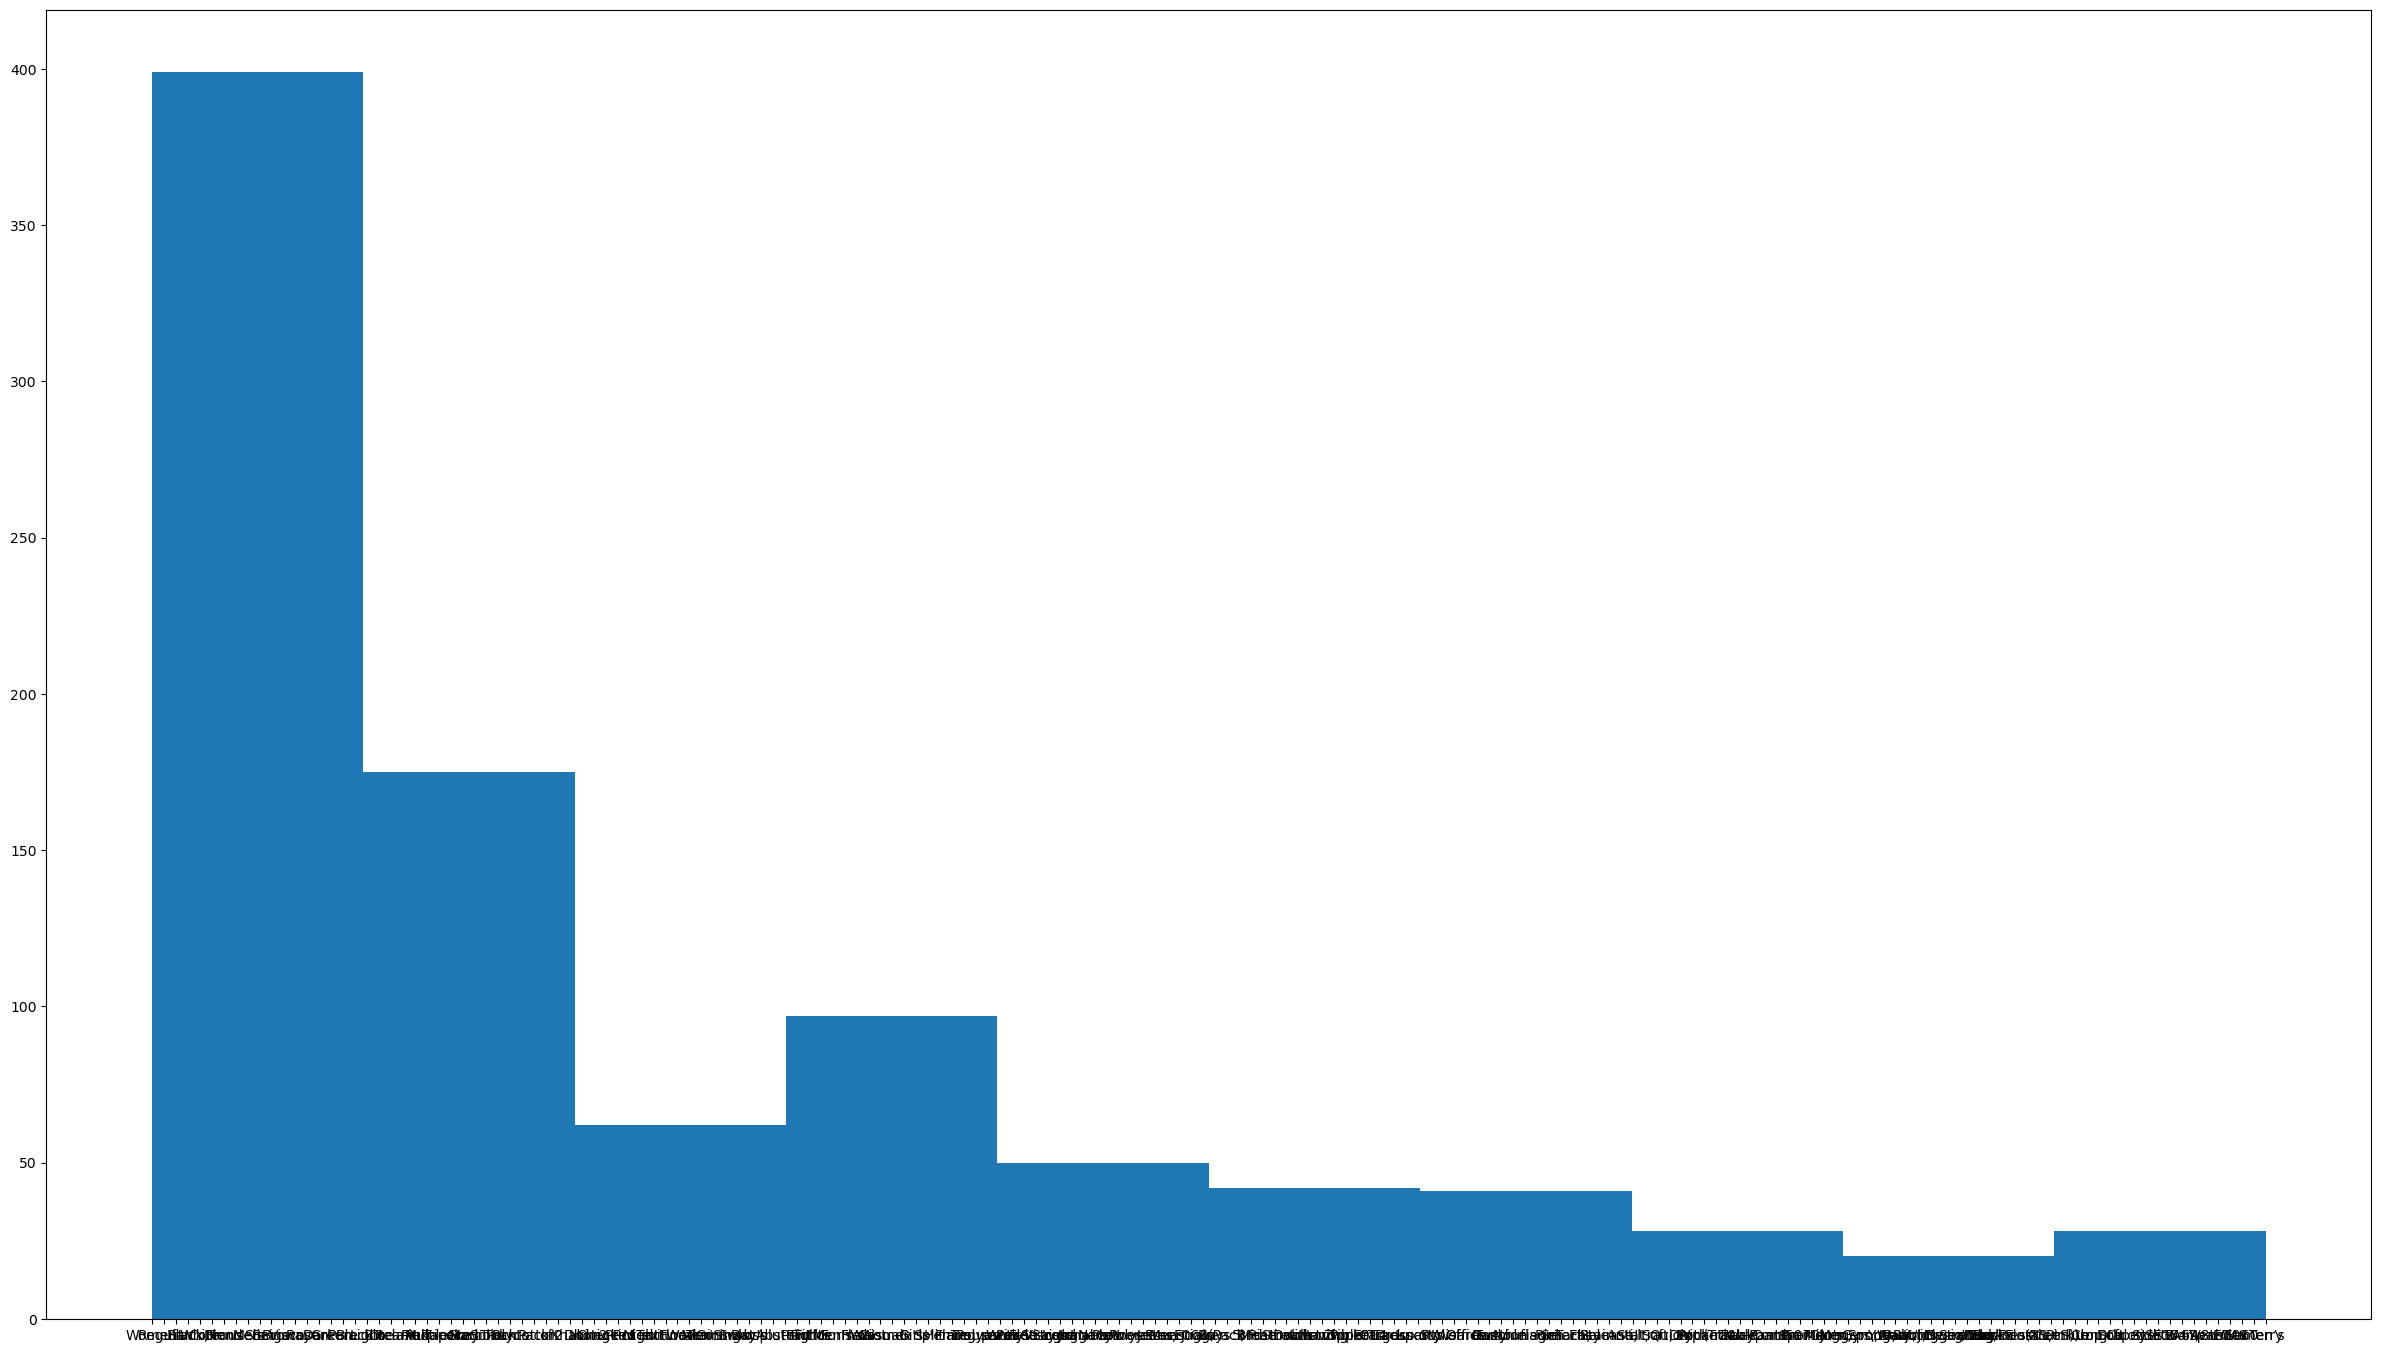

In [263]:
fig, ax = plt.subplots(figsize=(30, 17))
ax.hist(keyWords)

plt.show()


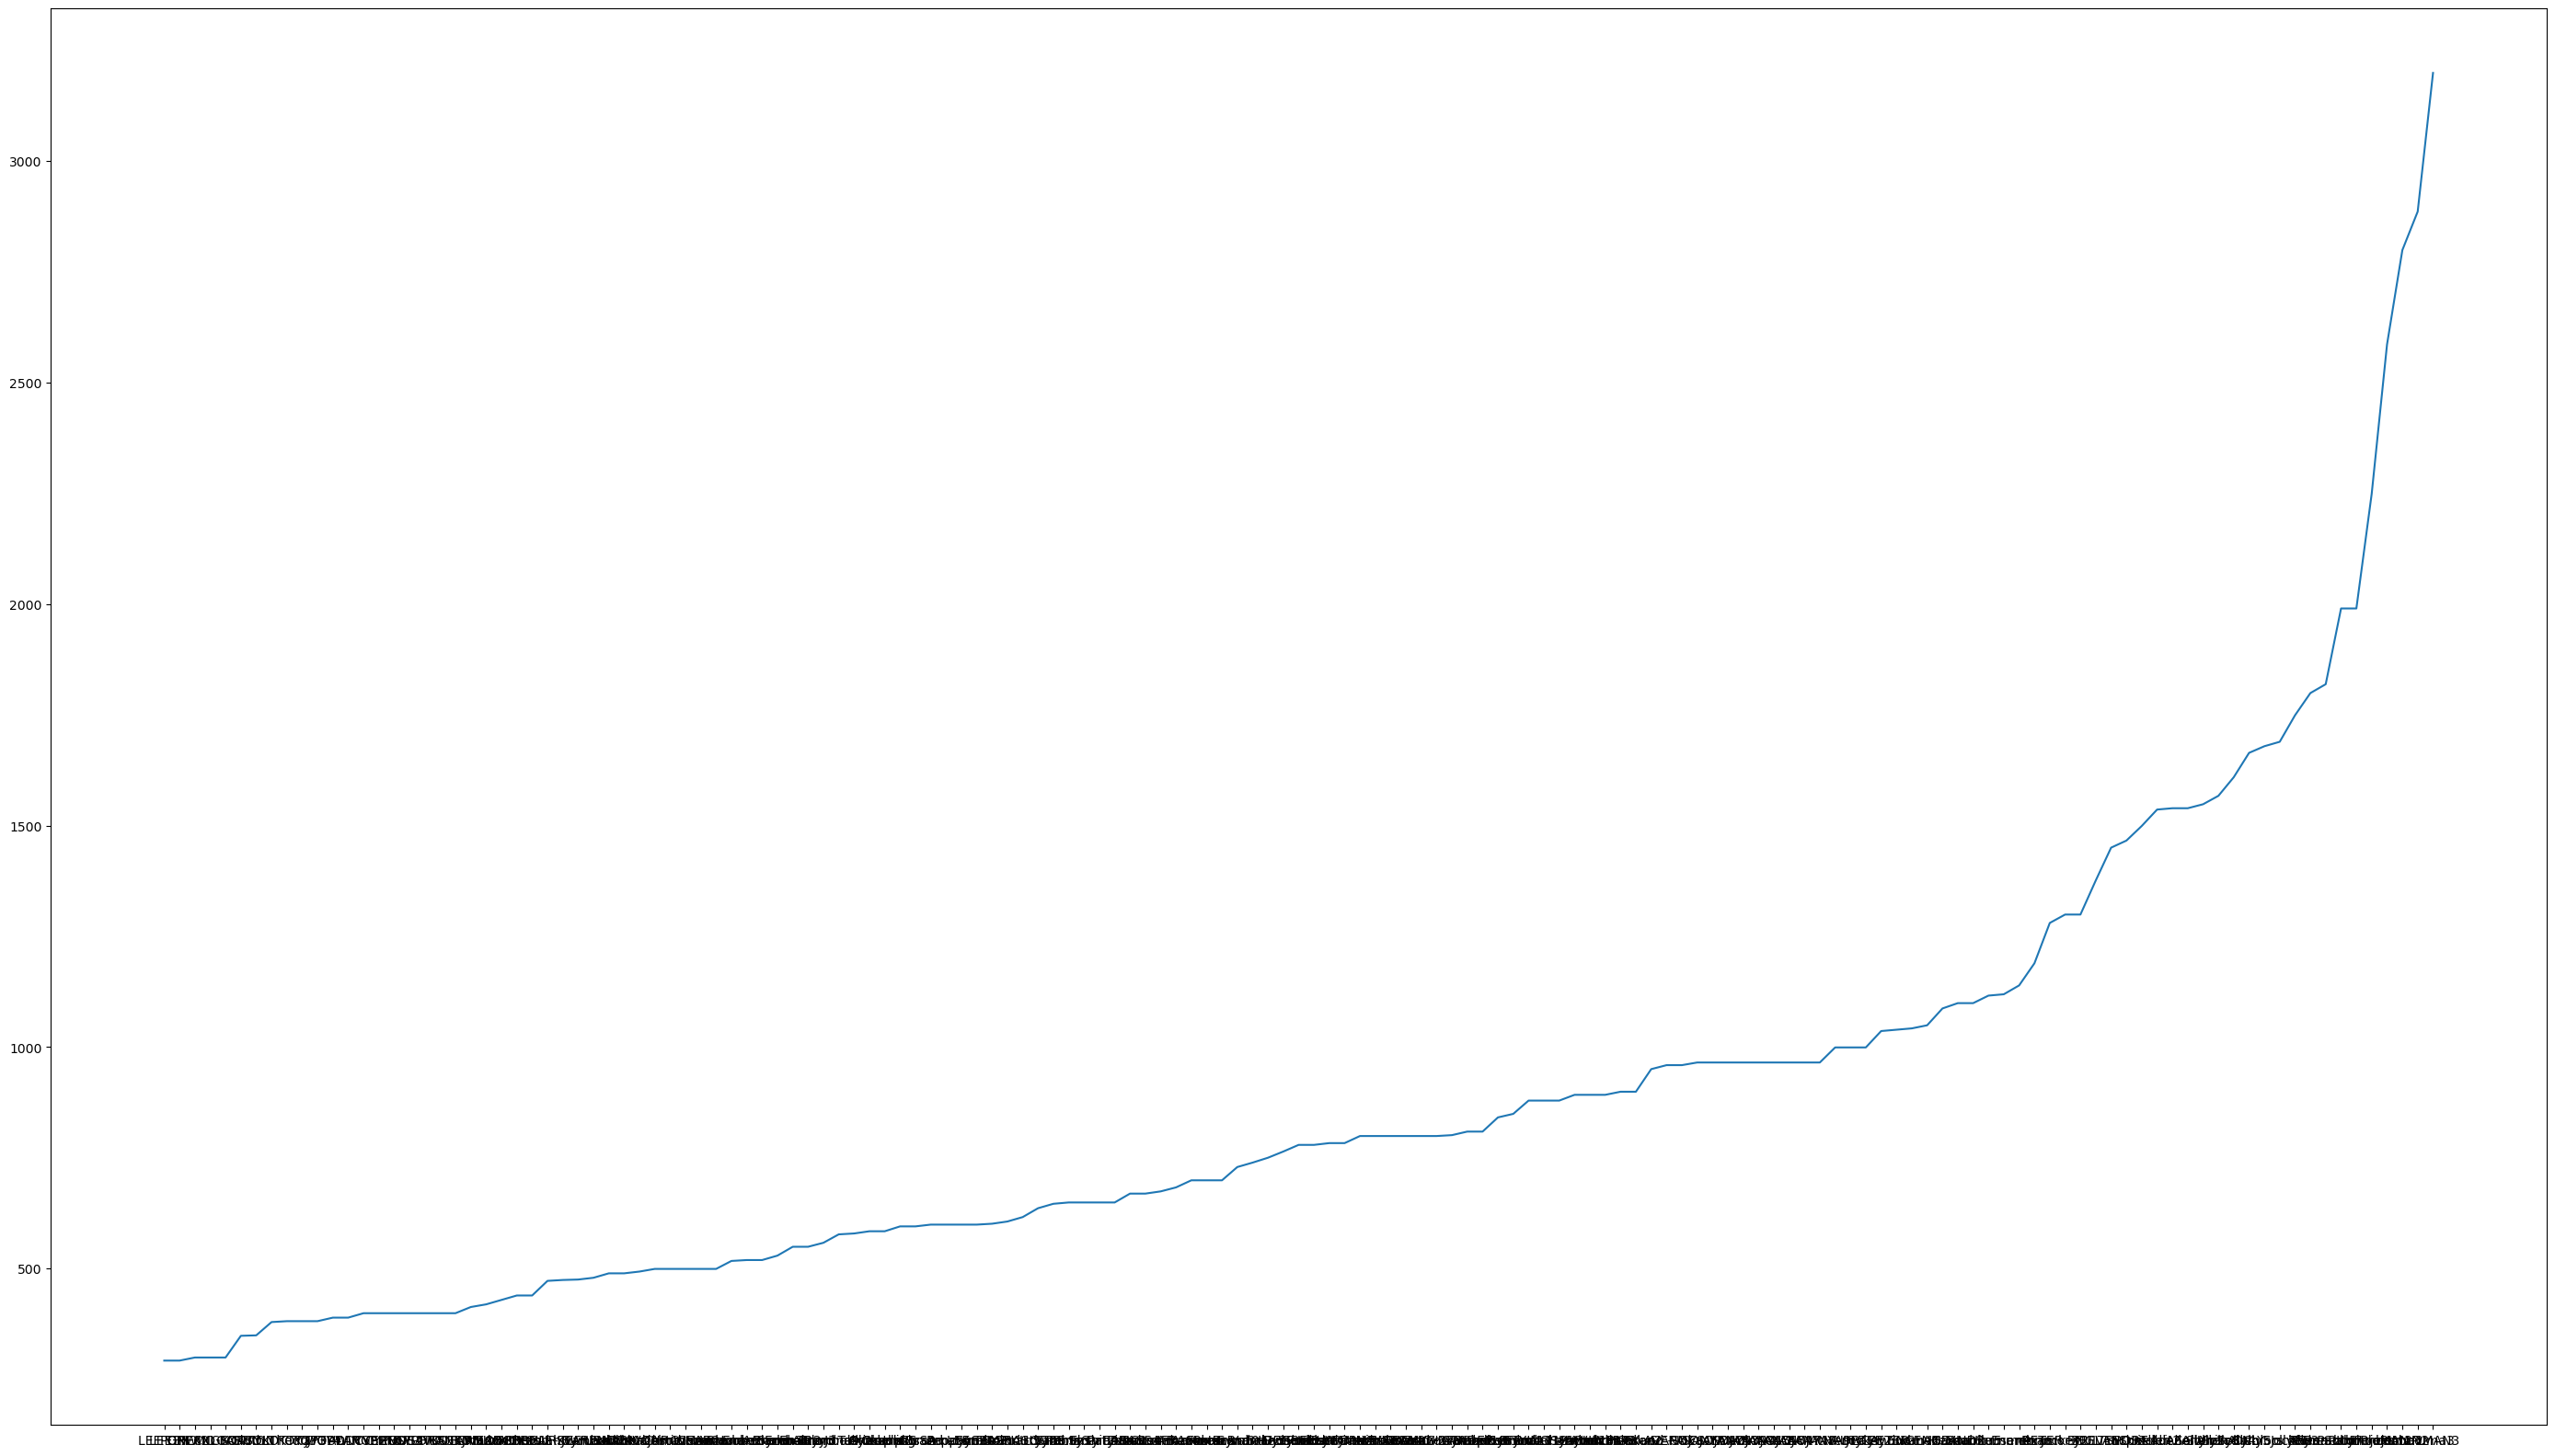

In [264]:
fig, ax = plt.subplots(figsize=(35, 20))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))

